<a href="https://colab.research.google.com/github/Kushank2003/Global--Carbon-Emissions-Analysis/blob/main/Global_Carbon_Emissions_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
try:
    df = pd.read_csv('owid-co2-data.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: owid-co2-data.csv not found. Please ensure the file is in the correct directory.")
    exit() # Exit if the file is not found

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get information about the dataset (data types, non-null values)
print("\nDataset Info:")
df.info()

# Get summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

Data loaded successfully.

First 5 rows of the dataset:
       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1         

In [3]:
# Select relevant columns, use 'co2' instead of 'total_emissions'
df_emissions = df[['country', 'year', 'co2']].copy()

# Drop rows with missing co2
df_emissions.dropna(subset=['co2'], inplace=True)

# Check for remaining missing values
print("\nMissing values after dropping:")
print(df_emissions.isnull().sum())

# Check data types again
print("\nData types:")
print(df_emissions.dtypes)


Missing values after dropping:
country    0
year       0
co2        0
dtype: int64

Data types:
country     object
year         int64
co2        float64
dtype: object


In [4]:
# Get the range of years
print(f"\nYears covered: {df_emissions['year'].min()} to {df_emissions['year'].max()}")

# Get the number of unique countries
print(f"Number of unique countries: {df_emissions['country'].nunique()}")

# List a few unique countries
print("\nSample Countries:")
print(df_emissions['country'].unique()[:10])


Years covered: 1750 to 2023
Number of unique countries: 144

Sample Countries:
['Afghanistan' 'Africa' 'Africa (GCP)' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda']


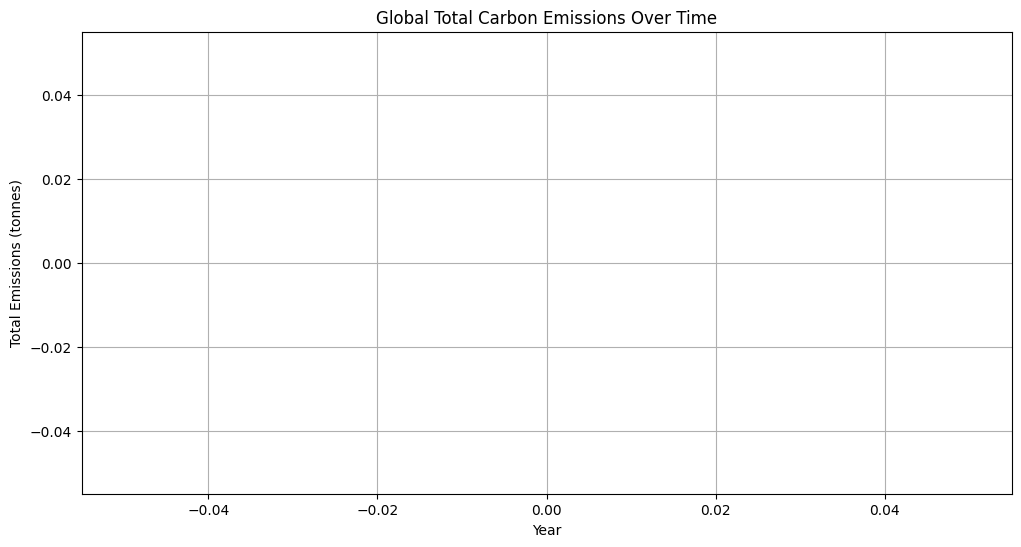

In [7]:
# Plot global total emissions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_world_emissions, x='year', y='co2') # Changed 'total_emissions' to 'co2'
plt.title('Global Total Carbon Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions (tonnes)')
plt.grid(True)
plt.show()

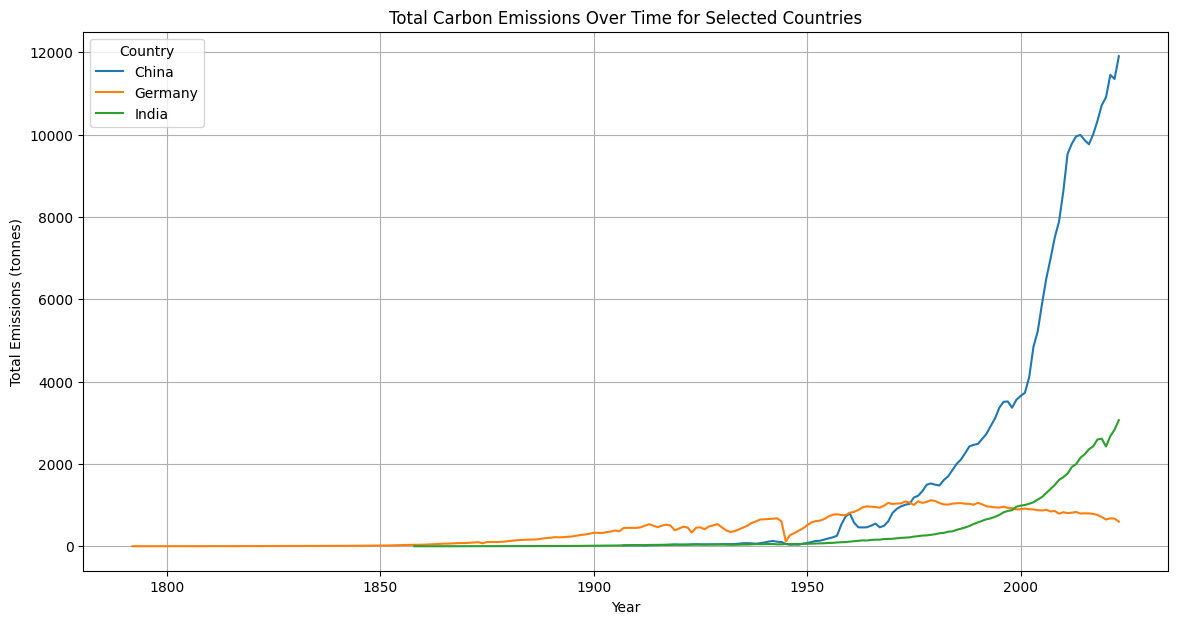

In [9]:
# Select a few countries for comparison
selected_countries = ['United States', 'China', 'India', 'Germany', 'United Kingdom']
df_selected_countries = df_emissions[df_emissions['country'].isin(selected_countries)].copy()

# Plot emissions for selected countries over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_selected_countries, x='year', y='co2', hue='country') # Changed 'total_emissions' to 'co2'
plt.title('Total Carbon Emissions Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Total Emissions (tonnes)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

<ipython-input-13-2638061c9db7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_emitters_latest, x='co2', y='country', palette='viridis')


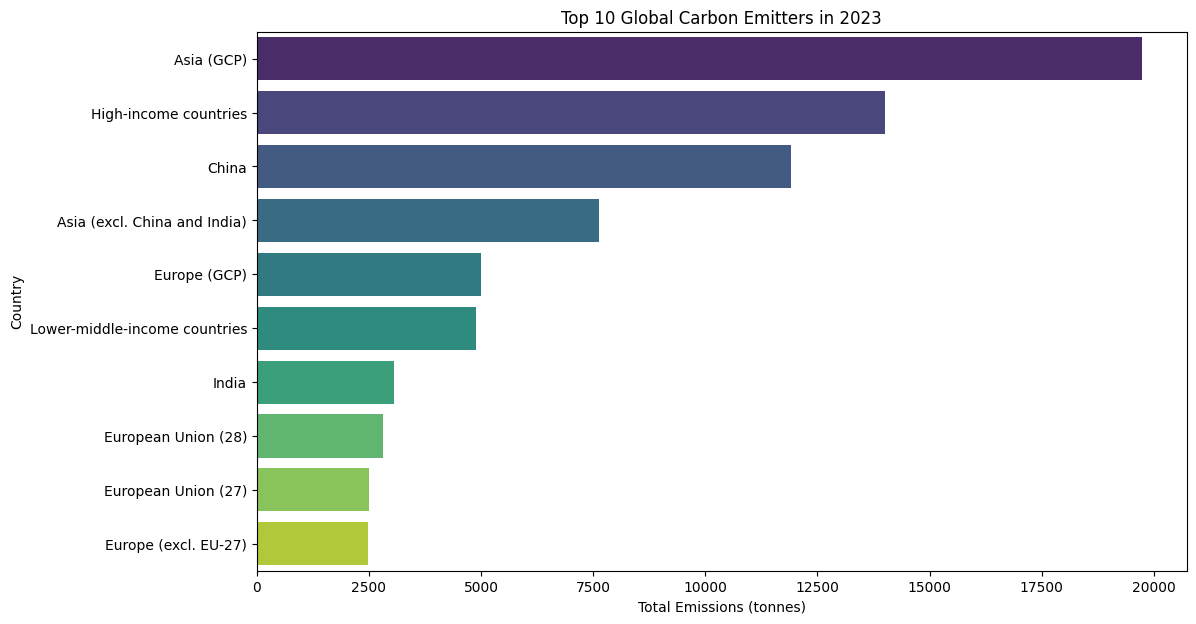

In [13]:
# Get the most recent year in the dataset
latest_year = df_emissions['year'].max()

# Filter data for the latest year, excluding 'World' and other aggregates
df_latest_year = df_emissions[(df_emissions['year'] == latest_year) &
                              (~df_emissions['country'].isin(['World', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']))].copy()

# Get the top 10 emitters in the latest year
# Changed 'total_emissions' to 'co2' to match the selected column in df_emissions
df_top_emitters_latest = df_latest_year.nlargest(10, 'co2')

# Plot the top 10 emitters
plt.figure(figsize=(12, 7))
# Changed 'total_emissions' to 'co2' to match the selected column in df_emissions
sns.barplot(data=df_top_emitters_latest, x='co2', y='country', palette='viridis')
plt.title(f'Top 10 Global Carbon Emitters in {latest_year}')
plt.xlabel('Total Emissions (tonnes)')
plt.ylabel('Country')
plt.show()

In [15]:
# Data for the latest year again, ensuring it includes country codes if available in the original data
# (You might need to merge with a country code dataset if not present)
# Assuming 'iso_code' column exists in the original df and is carried over
df_latest_year_map = df[(df['year'] == latest_year) &
                        (~df['country'].isin(['World', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']))].copy()
# Changed 'total_emissions' to 'co2' to be consistent with previous changes
df_latest_year_map.dropna(subset=['co2', 'iso_code'], inplace=True)


# Create a choropleth map
fig = px.choropleth(df_latest_year_map,
                    locations="iso_code", # or 'country' if using names
                    # Changed 'total_emissions' to 'co2' to be consistent with previous changes
                    color="co2",
                    hover_name="country",
                    animation_frame="year" if 'year' in df_latest_year_map.columns else None, # Optional: if you want to animate over years
                    color_continuous_scale="Viridis",
                    title=f'Global Carbon Emissions by Country in {latest_year}')
fig.show()

In [17]:
# Example of interpreting findings based on plots generated
print(f"\nAnalysis Summary for {latest_year}:")
print(f"- The top emitting country in {latest_year} was {df_top_emitters_latest.iloc[0]['country']} with {df_top_emitters_latest.iloc[0]['co2']:.2f} tonnes.") # Changed 'total_emissions' to 'co2'
print("- [Add other interpretations based on your visualizations, e.g., trends observed, significant changes]")


Analysis Summary for 2023:
- The top emitting country in 2023 was Asia (GCP) with 19747.37 tonnes.
- [Add other interpretations based on your visualizations, e.g., trends observed, significant changes]
